# Indice


Lo único que tienes que hacer es la visualización y exploración, pero ahora con el de 2015-2018-school attendance.

- [Está separado por escuela. Si quieremos ver el promedio "global", ¿cómo lo juntamos? (hint: groupby)](#1)
- [Crea columnas de porcentajes. Si faltaron 10 de 20 es muy diferente que si faltaron 10 de 10000](#2)
- [Visualiza cada variable](#3)
- [Visualiza las parejas de variables. Usa scatter para ver relaciones. hex plots?](#4)

In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

TimeSeries_1.ipynb	       archive	faces	models
TimeSeries_H1Visualizar.ipynb  data	images	mydata


In [3]:
datawork = pd.read_csv('/notebooks/storage/mydata/2015-2018-historical-daily-attendance-by-school-1.csv')

In [4]:
datawork.head()

,School,Date,SchoolYear,Enrolled,Present,Absent,Released
0,01M015,01/04/2016,20152016,168,157,11,0
1,01M015,01/05/2016,20152016,168,153,15,0
2,01M015,01/06/2016,20152016,168,163,5,0
3,01M015,01/07/2016,20152016,168,154,14,0
4,01M015,01/08/2016,20152016,168,158,10,0


In [5]:
datawork.Date

0         01/04/2016
1         01/05/2016
2         01/06/2016
3         01/07/2016
4         01/08/2016
             ...    
843128    12/18/2017
843129    12/19/2017
843130    12/20/2017
843131    12/21/2017
843132    12/22/2017
Name: Date, Length: 843133, dtype: object

In [6]:
# Vamos a establecer el tipo de dato para las fechas así como asignar las fechas como index
# Esto con la finalidad de una mayor comodidad a la hora de trabajar
datawork = pd.read_csv('/notebooks/storage/mydata/2015-2018-historical-daily-attendance-by-school-1.csv', index_col='Date', parse_dates=True)

In [7]:
datawork.head()

,School,SchoolYear,Enrolled,Present,Absent,Released
Date,,,,,,
2016-01-04,01M015,20152016,168,157,11,0
2016-01-05,01M015,20152016,168,153,15,0
2016-01-06,01M015,20152016,168,163,5,0
2016-01-07,01M015,20152016,168,154,14,0
2016-01-08,01M015,20152016,168,158,10,0


In [8]:
datawork.describe()

,SchoolYear,Enrolled,Present,Absent,Released
count,8.431330e+05,843133.000000,843133.000000,843133.000000,843133.000000
mean,2.016199e+07,600.041643,546.938544,50.561870,2.541230
std,8.188979e+03,485.341866,456.234497,60.284892,29.717674
min,2.015202e+07,1.000000,1.000000,0.000000,0.000000
25%,2.015202e+07,320.000000,282.000000,22.000000,0.000000
50%,2.016202e+07,483.000000,435.000000,37.000000,0.000000
75%,2.017202e+07,706.000000,658.000000,60.000000,0.000000
max,2.017202e+07,5850.000000,5752.000000,3332.000000,3777.000000


<AxesSubplot:ylabel='Date'>

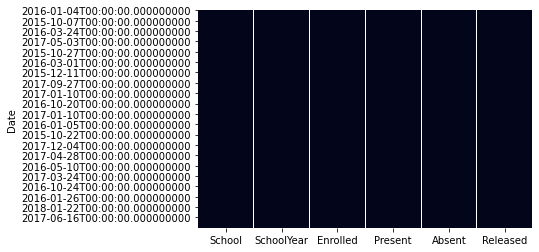

In [9]:
# En busca de valores nulos 
sns.heatmap(datawork.isnull(), cbar=False)

In [10]:
datawork.isnull().values.any() 
# No hay valores nulos en el dataset

False

<a id="1"><h3>
- Está separado por escuela. Si quieremos ver el promedio "global", ¿cómo lo juntamos? (hint: groupby)
    </h3></a>

In [11]:
# Para verlo por escuela, agrupamos por la escuela
by_school = datawork.groupby("School").mean()
by_school

,SchoolYear,Enrolled,Present,Absent,Released
School,,,,,
01M015,2.016202e+07,176.281955,164.590226,11.546992,0.144737
01M019,2.016202e+07,266.744361,242.631579,23.941729,0.171053
01M020,2.016202e+07,535.383459,497.968045,37.069549,0.345865
01M034,2.016202e+07,358.934211,325.776316,33.033835,0.124060
01M063,2.016202e+07,202.065789,187.291353,14.503759,0.270677
...,...,...,...,...,...
75X754,2.016200e+07,483.953184,278.960674,190.222846,14.769663
75X811,2.016202e+07,632.620561,524.000000,101.557009,7.063551
79M331,2.017202e+07,11.228395,6.006173,5.222222,0.000000


In [12]:
# Añadimos la columna año
datawork['Año'] = datawork.index.year

In [13]:
# Agrupamos por año para verlo por año
by_year = datawork.groupby('Año').mean()

In [14]:
by_year.sort_index()

,SchoolYear,Enrolled,Present,Absent,Released
Año,,,,,
2015,2.015202e+07,602.376979,559.505774,41.991897,0.879307
2016,2.015586e+07,601.123992,548.272982,50.308375,2.542635
2017,2.016607e+07,600.533466,548.391938,49.699210,2.442318
2018,2.017202e+07,595.838995,533.999706,58.048414,3.790875


In [15]:
# Añadimos la columna mes
datawork['Mes'] = datawork.index.month

In [16]:
# Agrupamos por mes para verlo por mes
by_month = datawork.groupby("Mes").mean()
by_month.sort_index()

,SchoolYear,Enrolled,Present,Absent,Released,Año
Mes,,,,,,
1,2.016208e+07,599.452458,538.661099,54.441899,6.349461,2017.006748
2,2.016182e+07,599.847474,547.051721,51.424686,1.371068,2016.980462
3,2.016167e+07,600.107721,545.028961,54.224502,0.854258,2016.965416
4,2.016199e+07,599.457563,549.603671,49.147622,0.706269,2016.997399
5,2.016215e+07,599.555883,548.076528,50.790308,0.689046,2017.012867
6,2.016132e+07,596.598064,506.377459,75.699640,14.520964,2016.929842
9,2.016269e+07,600.258103,560.488200,39.210514,0.559389,2016.067704
10,2.016199e+07,601.574686,562.296132,38.696054,0.582500,2015.997766
11,2.016237e+07,601.496476,556.546996,44.320104,0.629377,2016.034979


<a id="2"><h3>
- Crea columnas de porcentaje
</h3></a>

In [17]:
# Filtramos por escuela para formar los grupos y añadir columnas de porcentaje
len(list(set(datawork.School)))

1649

In [18]:
# Dado que son demasiadas escuelas, construiremos una función 
schools = list(set(datawork.School))

In [19]:
datawork.head(5)

,School,SchoolYear,Enrolled,Present,Absent,Released,Año,Mes
Date,,,,,,,,
2016-01-04,01M015,20152016,168,157,11,0,2016,1
2016-01-05,01M015,20152016,168,153,15,0,2016,1
2016-01-06,01M015,20152016,168,163,5,0,2016,1
2016-01-07,01M015,20152016,168,154,14,0,2016,1
2016-01-08,01M015,20152016,168,158,10,0,2016,1


In [20]:
# Me marcaba error a la hora de buscar por el indice así que para
# resolver hice lo siguiente
# obtenido de: https://stackoverflow.com/questions/64106628/why-assertionerror-having-numpy-ndarray
datawork.index = pd.to_datetime(datawork.index)

In [21]:
datawork = datawork.sort_index()

In [22]:
datawork.head()

,School,SchoolYear,Enrolled,Present,Absent,Released,Año,Mes
Date,,,,,,,,
2015-09-08,07X527,20152016,507,327,180,0,2015,9
2015-09-08,24Q744,20152016,198,147,51,0,2015,9
2015-09-08,27Q333,20152016,560,559,1,0,2015,9
2015-09-09,01M188,20152016,479,443,36,0,2015,9
2015-09-09,19K007,20152016,954,863,91,0,2015,9


In [44]:
def add_percent(nombre_escuela, datos, intervalo, label, work_with = 'Enrolled', all_groups = False):
    """Función para añadir una columna con los porcentajes en el intervalo
    establecido.
    nombre_escuela: str nombre || list nombres
    datos: dataframe
    intervalo: str intervalo, solo año y mes -> '2015-10' (porque marca error si paso día, no sé la razón)
    label: str nombre para la nueva columna
    work_with = str nombres de columnas en el df (solo uno): Enrolled, Present, Absent, Released
    all_groups = bool (True si nombre_escuela es lista: False si nombre_escuela es string)
    return: pandas dataframe
    """
    
    columnName = f"{label} {intervalo}" # Creamos el nombre de la columna a añadir
    tmp_data = datawork[intervalo].copy() # Creamos una copia del df original pero ya filtrado por fecha
        
    if all_groups == False:
        
        try:
            maxim = max(tmp_data.loc[(tmp_data.School == nombre_escuela)][work_with]) # Obtenemos el mayor valor de Enrolled
            grupo = pd.DataFrame(tmp_data.loc[(tmp_data.School == nombre_escuela)]) # filtramos
            aux = [maxim for i in range(len(grupo))] # creamos un arreglo auxiliar
            grupo[columnName] = round((grupo[work_with]/aux)*100, 4) # Añadimos la nueva columna
        except:
            pass
    
    elif all_groups == True and type(nombre_escuela) == list:
        all_dataframes = [] # Creamos el arreglo que guardara los dataframes
        
        
        for name_school in nombre_escuela: 
            try:
                maxim = max(tmp_data.loc[(tmp_data.School == name_school)][work_with]) # Obtenemos el mayor valor de Enrolled
                grupo = pd.DataFrame(tmp_data.loc[(tmp_data.School == name_school)]) # filtramos
                aux = [maxim for i in range(len(grupo))] # creamos un arreglo auxiliar
                grupo[columnName] = round((grupo[work_with]/aux)*100, 4) # Añadimos la nueva columna
                all_dataframes.append(grupo) # añadimos el dataframe al arreglo
            except:
                pass # Algunas escuelas no es encuentran en el intervalo, por lo tanto las ignoramos
        
        grupo = pd.concat(all_dataframes, axis=0) # juntamos por columnas los dataframes guardados
    else: 
        return None
            
        
            
    try:  
        return grupo
    except:
        return None

In [45]:
# Para añadir una nueva columna de porcentaje de inscritos de una solo una escuela
filter_escuela = add_percent(nombre_escuela = "06M325", datos = datawork, intervalo = '2015-12', label = '% Inscritos')

In [35]:
# Para añadir una nueva columna de porcentaje de inscritos para todas las escuelas
filter_grupo_escuelas = add_percent(nombre_escuela = schools, datos = datawork, intervalo = '2015-12', label = '% Inscritos', all_groups = True)

In [47]:
filter_escuela.head()

,School,SchoolYear,Enrolled,Present,Absent,Released,Año,Mes,% Inscritos 2015-12
Date,,,,,,,,,
2015-12-01,06M325,20152016,240,221,19,0,2015,12,98.7654
2015-12-02,06M325,20152016,241,231,10,0,2015,12,99.1770
2015-12-03,06M325,20152016,242,211,13,18,2015,12,99.5885
2015-12-04,06M325,20152016,242,222,20,0,2015,12,99.5885
2015-12-07,06M325,20152016,242,220,22,0,2015,12,99.5885


In [48]:
filter_grupo_escuelas.loc[(filter_grupo_escuelas.School== "06M325")]

,School,SchoolYear,Enrolled,Present,Absent,Released,Año,Mes,% Inscritos 2015-12
Date,,,,,,,,,
2015-12-01,06M325,20152016,240,221,19,0,2015,12,98.7654
2015-12-02,06M325,20152016,241,231,10,0,2015,12,99.1770
2015-12-03,06M325,20152016,242,211,13,18,2015,12,99.5885
2015-12-04,06M325,20152016,242,222,20,0,2015,12,99.5885
2015-12-07,06M325,20152016,242,220,22,0,2015,12,99.5885
2015-12-08,06M325,20152016,242,227,15,0,2015,12,99.5885
2015-12-09,06M325,20152016,242,224,18,0,2015,12,99.5885
2015-12-10,06M325,20152016,242,233,9,0,2015,12,99.5885
2015-12-11,06M325,20152016,242,229,13,0,2015,12,99.5885


In [52]:
# Para añadir una nueva columna de porcentaje de ausentes de una solo una escuela
filter_escuela_ausente = add_percent(nombre_escuela = "06M325", datos = datawork, intervalo = '2015-10', label = '% Ausentes', work_with = "Absent")

In [53]:
filter_escuela_ausente.head()

,School,SchoolYear,Enrolled,Present,Absent,Released,Año,Mes,% Ausentes 2015-10
Date,,,,,,,,,
2015-10-01,06M325,20152016,242,223,19,0,2015,10,73.0769
2015-10-02,06M325,20152016,242,216,26,0,2015,10,100.0000
2015-10-05,06M325,20152016,242,232,10,0,2015,10,38.4615
2015-10-06,06M325,20152016,242,230,12,0,2015,10,46.1538
2015-10-07,06M325,20152016,242,229,13,0,2015,10,50.0000
2015-10-08,06M325,20152016,243,229,14,0,2015,10,53.8462
2015-10-09,06M325,20152016,243,229,14,0,2015,10,53.8462
2015-10-13,06M325,20152016,243,223,20,0,2015,10,76.9231
2015-10-14,06M325,20152016,244,228,16,0,2015,10,61.5385


<a id="3"><h3>
- Visualiza cada variable
</h3></a>

<AxesSubplot:xlabel='Año'>

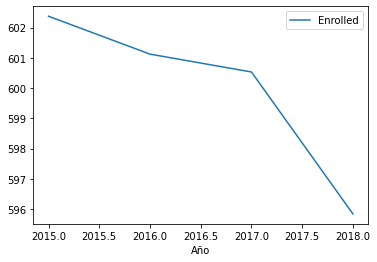

In [55]:
# Inscrito
Enrolled = datawork[["Enrolled", "Año"]]
Enrolled.groupby('Año').mean().plot.line()

> No sé a dónde corresponden estos datos de escuelas pero al parecer hay una fuerte tendencia a no inscribirse a la escuela conforme pasan los años. En promedio, conforme pasa el tiempo, menos alumnos se inscriben

<AxesSubplot:xlabel='Mes'>

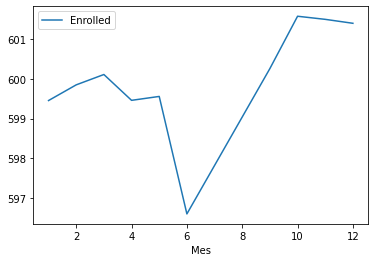

In [58]:
# Inscrito by month
Enrolled_month = datawork[["Enrolled", "Mes"]]
Enrolled_month.groupby('Mes').mean().plot.line()

> Pero si revisamos el promedio por mes, podemos ver que hay una tendencia a la alza en el segundo semestre del año. 

<AxesSubplot:xlabel='Año'>

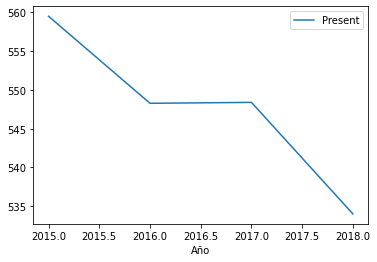

In [72]:
# Presente
Present = datawork[["Present", "Año"]]
Present.groupby('Año').mean().plot.line()

> Consecuentemente, en promedio, la presencia a disminuido...

<AxesSubplot:xlabel='Mes'>

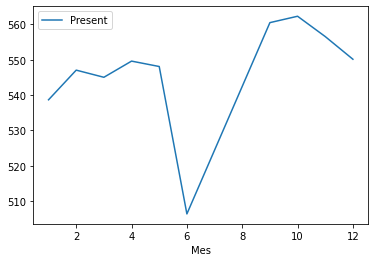

In [71]:
# Presente by month
Present_month = datawork[["Present", "Mes"]]
Present_month.groupby('Mes').mean().plot.line()

> Sin embargo, al observarlo por mes vemos una tendencia similar a la de inscritos por mes. 
Tal vez la disminución estrepitosa al finalizar el primer semestre del año e iniciar el segundo
se debe a las vacaciones. 

<AxesSubplot:xlabel='Año'>

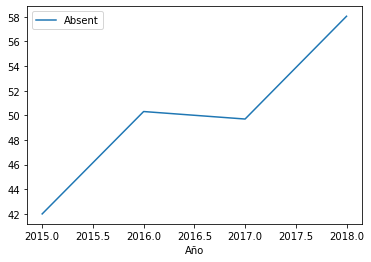

In [68]:
# Ausente
Absent = datawork[["Absent", "Año"]]
Absent.groupby('Año').mean().plot.line()

> Y la ausencia a aumentado

<AxesSubplot:xlabel='Mes'>

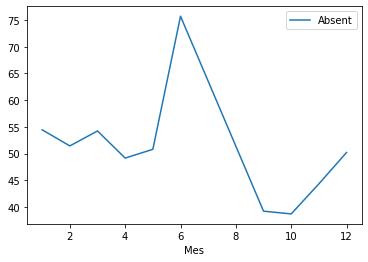

In [69]:
# Ausente by month
Absent_month = datawork[["Absent", "Mes"]]
Absent_month.groupby('Mes').mean().plot.line()

> Podemos observar una clara correlación negativa entre absent y present

<a id="4"><h3>
- Visualiza las parejas de variables. Usa scatter para ver relaciones. hex plots?
</h3></a>

In [76]:
# Antes de proceder a buscar relaciones, busco las correlaciones entre variables
# para darme una idea de que busco
datawork.corr(method='pearson')

,SchoolYear,Enrolled,Present,Absent,Released,Año,Mes
SchoolYear,1.000000,-0.003342,-0.005629,0.016644,-0.001931,0.855987,0.011759
Enrolled,-0.003342,1.000000,0.991840,0.540501,0.008282,-0.003923,0.001535
Present,-0.005629,0.991840,1.000000,0.443876,-0.054243,-0.014506,0.012602
Absent,0.016644,0.540501,0.443876,1.000000,-0.015763,0.066332,-0.066765
Released,-0.001931,0.008282,-0.054243,-0.015763,1.000000,0.024063,-0.032971
Año,0.855987,-0.003923,-0.014506,0.066332,0.024063,1.000000,-0.465485
Mes,0.011759,0.001535,0.012602,-0.066765,-0.032971,-0.465485,1.000000


Observamos tres correlaciones que sobresalen del resto: Present-Enrolled, Absent-Enrolled, Absent-Present

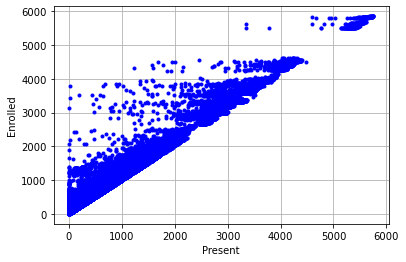

In [91]:
from matplotlib import pylab, mlab, pyplot
#datawork["Año"]

grid()
xlabel("Present")
ylabel("Enrolled")
plot(datawork.Present, datawork.Enrolled, 'b.')

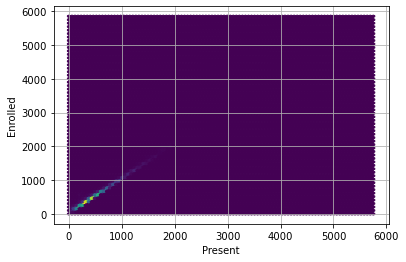

In [103]:
grid()
xlabel("Present")
ylabel("Enrolled")
plt.hexbin(datawork.Present, datawork.Enrolled)

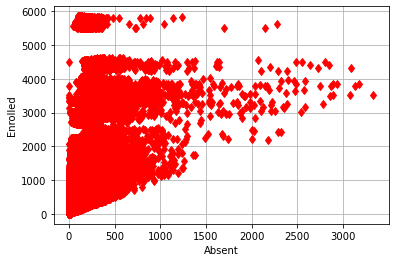

In [92]:
grid()
xlabel("Absent")
ylabel("Enrolled")
plot(datawork.Absent, datawork.Enrolled, 'rd')

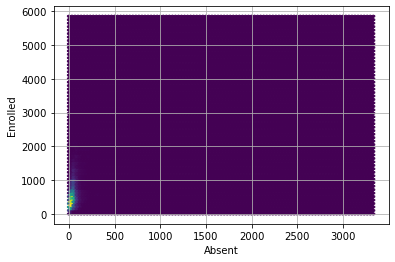

In [102]:
grid()
xlabel("Absent")
ylabel("Enrolled")
plt.hexbin(datawork.Absent, datawork.Enrolled)

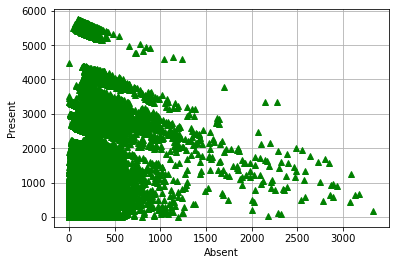

In [93]:
grid()
xlabel("Absent")
ylabel("Present")
plot(datawork.Absent, datawork.Present, 'g^')

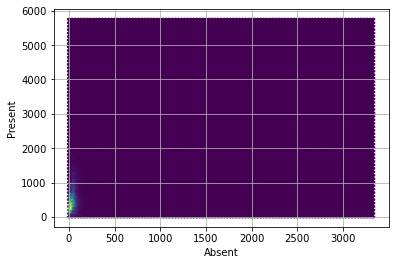

In [100]:
# Make the plot
#plt.hexbin(X, Y, gridsize=(15,15) )
#plt.show()
grid()
xlabel("Absent")
ylabel("Present")
plt.hexbin(datawork.Absent, datawork.Present)